# CIAG 2024 - Introdução ao Aprendizado de Máquina

> Indented block



- Neste notebook, iremos rever conceitos importantes referentes ao Aprendizado de Máquina, como problemas de regressão vs. classificação, divisão dos dados em conjuntos de treino, validação e teste e avaliação dos modelos utilizados (métricas de precisão e revocação, por exemplo). Iremos utilizar basicamente dois *toy-datasets* que podem ser encontrados na documentação da biblioteca `scikit-learn`, sendo eles a base de dados [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris), para classificação, e de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes), para regressão.

In [1]:
# Caso queira saber a versão do Python que está sendo executada neste notebook, basta executar esta célula
!python --version

Python 3.10.12


## 1. Conjunto de Exercícios - Carregamento das bases de dados

- Para começarmos a revisão de aprendizado de máquina, primeiro devemos ser capazes de carregar as bases de dados em memória. Iremos definir em detalhes um *pipeline* de processamento completo, ou seja, desde o carregamento dos dados até o treinamento dos modelos, para a base de dados Iris, e a sua tarefa, posteriormente, será de replicar as mesmas ideias para a base de dados de Diabetes.



In [2]:
# Importando as funções para carregar os dados em memória
from sklearn.datasets import load_iris, load_diabetes

In [3]:
# Podemos brincar com alguns parâmetros presentes na documentação.
# Aqui, iremos carregar os dados como tabelas Pandas, apenas para uma visualização mais limpa.

X, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## 2. Conjunto de Exercícios - Divisão entre treino/validação/teste

- Como visto em sala de aula, tipicamente separamos os dados em 3 conjuntos: Treino, Validação e Teste, onde cada um deles possuem um propósito específico, como podemos ver a seguir:
    - **Treino:** Como o nome diz, esse conjunto dos dados serve para treinarmos os nossos modelos. Em outras palavras, encontrar os pesos dos nossos modelos que minimizam um certo erro;

    - **Validação:** Como o nome diz, esse conjunto dos dados serve para validarmos os nossos modelos. Tipicamente, quando trabalhamos com aprendizado de máquina, temos diversos modelos com hiperparâmetros que devemos otimizar de acordo com os nossos dados, como por exemplo: a profundidade de uma árvore, o número de vizinhos de um KNN, entre outros. Para isso, utilizamos o conjunto de validação para verificar qual variação dos hiperparâmetros do nosso modelo é a mais promissora;
    
    - **Teste:** O conjunto de teste é o conjunto que não iremos utilizar nem durante o treinamento nem durante a a validação do nosso modelo. O intuito desse conjunto de dados é representar dados novos, que o nosso modelo não viu ainda, a fim de mensurar a qualidade das nossas predições em dados reais.

1. Utilizando a função [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), divida os dados carregados anteriormente em dois conjunos: treino e teste. Posteriormente, iremos definir o conjunto de validação utilizando validação cruzada em N-Folds, durante o treinamento dos nossos modelo.

**Dica:** Após implementar o treinamento dos modelos, volte nessa célula e brinque com a porcentagem dos dados que serão destinados para o conjunto de treino e teste. Além disso, para fins de reprodutibilidade, sugerimos que você defina um `random_state`, para evitar eventuais dores de cabeça com resultados inconsistentes.
- Uma outra dica útil é realizar um `shuffle` durante a divisão dos dados, já que as *labels* nessa base de dados estão agrupadas, introduzindo assim um potencial desbalanceamento de classes nos conjuntos. Leia a documentação da função para obter mais informações sobre como realizar esse `shuffle`.

In [6]:
from sklearn.model_selection import train_test_split

# Convertendo os valores para matrizes e vetores numpy
X = X.values
y = y.values

# Implemente aqui a sua solução
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Tamanho do conjunto de treino:', X_train.shape)
print('Tamanho do conjunto de teste:', X_test.shape)

Tamanho do conjunto de treino: (100, 4)
Tamanho do conjunto de teste: (50, 4)


2. Implemente também uma visualização da distribuição das classes nos dois conjuntos de dados através de gráficos de barra, utilizando a biblioteca `matplotlib`.

**Dica:** Utilize a classe `Counter` do módulo `collections`, nativo do Python, para contar quantas classes temos nas anotações de cada conjunto.

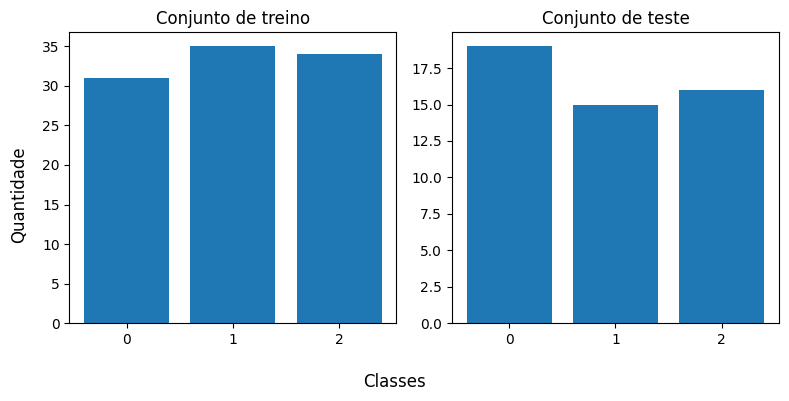

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Função auxiliar para ordenar um dicionário baseado nas chaves (caso precise)
def sort_dict(d):
    return {key: d[key] for key in sorted(d)}

# Implemente aqui a sua solução
train_labels = sort_dict(Counter(y_train))
test_labels = sort_dict(Counter(y_test))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].set_title('Conjunto de treino')
axs[0].bar(train_labels.keys(), train_labels.values())
axs[0].set_xticks(list(train_labels.keys()))

axs[1].set_title('Conjunto de teste')
axs[1].bar(test_labels.keys(), test_labels.values())
axs[1].set_xticks(list(test_labels.keys()))

fig.supxlabel('Classes')
fig.supylabel('Quantidade')

fig.tight_layout()
plt.show()

## 3. Conjunto de Exercícios - Treinamento dos modelos

- Como mencionado anteriormente, durante o treinamento dos modelos iremos utilizar uma validação cruzada com N-Folds. Além disso, iremos explorar 3 modelos clássicos durante os nossos exercícios, sendo eles: (i) Naive Bayes, que servirá como *baseline* para comparações futuras; (ii) árvores de decisão, podendo ficar livre para explorar "variantes" *ensemble* como no caso de modelos de *bagging* e *boosting*; e finalmente (iii) K-Nearest Neighbors.

In [8]:
# Definindo todos os imports necessários para esse conjunto de exercícios
# Caso necessário, inclua outros imports (principalmente se quiserem trabalhar com outros modelos)
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

1. Instancie um objeto da classe `KFold`, passando o número de *folds* que deseja utilizar durante o processo de validação cruzada (sugerimos um valor de 5 *folds*, mas fique a vontade para testar outros valores).

**Dica:** A mesma dica de definir um `random_state` se aplica também durante a definição do seu objeto da classe `KFold` se desejar habilitar a opção de `shuffle` da classe.

In [9]:
# Implemente a sua solução aqui
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print('Número de splits:', kf.get_n_splits(X_train))

Número de splits: 5


2. Treine o modelo Naive Bayes utilizando os dados de treino para realizar o loop de validação cruzada. Como o modelo a ser utilizado não possui hiperparâmetros, ele servirá como um ótimo *baseline* para o nosso problema.

**Dica:** Para mensurar a qualidade do seu modelo, utilize as métricas: acurácia, revocação e precisão. A biblioteca `sklearn` implementa tais funções, mas, caso queira, sinta-se a vontade para implementar as suas próprias funções para tais métricas.

In [10]:
# Caso queira utilizar as implementações padrões da biblioteca para as métricas
# Caso for utilizar precision e recall_score, lembre-se de definir o parâmetro 'average' para None. Dessa forma,
# as métricas serão calculadas para cada classe, ao invés de realizarmos algum tipo de sumarização.
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

- Utilize o seguinte trecho de código para implementar a validação cruzada utilizando N-Folds. Você pode utilizar `train_index` e `validation_index` para indexar as variáveis `X_train` e `y_train` para obter os conjuntos de treino e validação, respectivamente, da sua validação cruzada!

```python
# kf é um objeto da classe KFold
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Validation:  index={validation_index}")
```



In [11]:
# Implemente aqui a sua solução
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    gnb = GaussianNB()
    gnb.fit(X_train[train_index], y_train[train_index])

    preds = gnb.predict(X_train[val_index])
    print(f'\nResultados para o Fold-{i+1}:')
    print(f'  - Acurácia:', accuracy_score(y_train[val_index], preds))
    print(f'  - Precisão:', precision_score(y_train[val_index], preds, average=None))
    print(f'  - Revocação:', recall_score(y_train[val_index], preds, average=None))


Resultados para o Fold-1:
  - Acurácia: 0.95
  - Precisão: [1.  1.  0.9]
  - Revocação: [1.    0.875 1.   ]

Resultados para o Fold-2:
  - Acurácia: 0.9
  - Precisão: [1.   0.9  0.75]
  - Revocação: [1.   0.9  0.75]

Resultados para o Fold-3:
  - Acurácia: 0.9
  - Precisão: [1.         1.         0.71428571]
  - Revocação: [1.         0.71428571 1.        ]

Resultados para o Fold-4:
  - Acurácia: 0.9
  - Precisão: [1.         0.71428571 1.        ]
  - Revocação: [1.         1.         0.77777778]

Resultados para o Fold-5:
  - Acurácia: 1.0
  - Precisão: [1. 1. 1.]
  - Revocação: [1. 1. 1.]


3. Utilizando o mesmo *pipeline* de treinamento, treine agora um modelo baseado em Árvore de Decisão e K-Nearest Neighbors. Como hiperparâmetros, experimente variar a profundidade da sua árvore de decisão e o número de vizinhos mais próximos que o algoritmo de KNN deve considerar para as estimações.

**Dica:** Após cada loop por todos os *folds* da validação cruzada, tire a média das métricas para obter uma sumarização da qualidade do seu modelo ao utilizar um valor de hiperparâmetro específico. É recomendado você fazer um plot para aumentar a interpretação dos resultados, onde o eixo-x pode ser, por exemplo, o valor do hiperparâmetro e o eixo-y a acurácia tanto nos dados de treino quanto nos dados de validação.

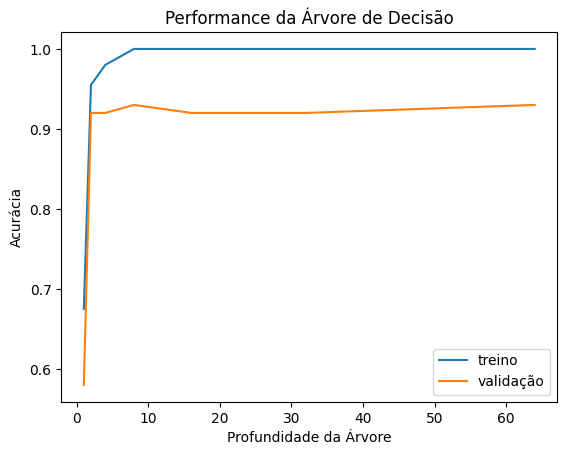

In [12]:
# Implemente a sua solução aqui
import numpy as np

heights = [1, 2, 4, 8, 16, 32, 64]
mean_accuracy = {
    'train': [],
    'validation': []
}

for height in heights:
    accuracy = {
        'train': [],
        'validation': []
    }

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        dt = DecisionTreeClassifier(max_depth=height)
        dt.fit(X_train[train_index], y_train[train_index])

        preds = dt.predict(X_train[train_index])
        accuracy['train'].append(accuracy_score(y_train[train_index], preds))

        preds = dt.predict(X_train[val_index])
        accuracy['validation'].append(accuracy_score(y_train[val_index], preds))

    mean_accuracy['train'].append(np.mean(accuracy['train']))
    mean_accuracy['validation'].append(np.mean(accuracy['validation']))

plt.title('Performance da Árvore de Decisão')
plt.ylabel('Acurácia')
plt.xlabel('Profundidade da Árvore')

plt.plot(heights, mean_accuracy['train'], label='treino')
plt.plot(heights, mean_accuracy['validation'], label='validação')

plt.legend()
plt.show()

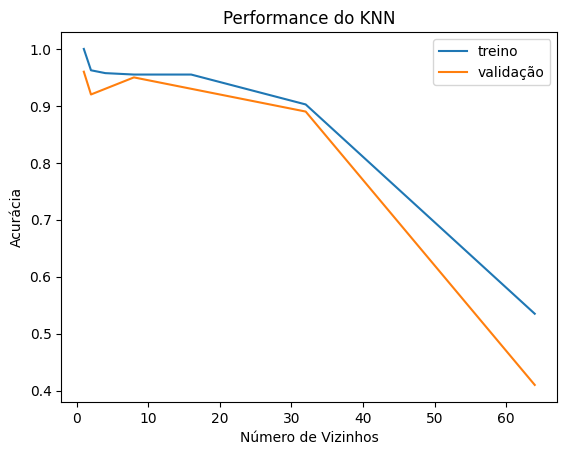

In [13]:
# Implemente a sua solução aqui
import numpy as np
neighbors = [1, 2, 4, 8, 16, 32, 64]
mean_accuracy = {
    'train': [],
    'validation': []
}

for neighbor in neighbors:
    accuracy = {
        'train': [],
        'validation': []
    }

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        nn = KNeighborsClassifier(n_neighbors=neighbor)
        nn.fit(X_train[train_index], y_train[train_index])

        preds = nn.predict(X_train[train_index])
        accuracy['train'].append(accuracy_score(y_train[train_index], preds))

        preds = nn.predict(X_train[val_index])
        accuracy['validation'].append(accuracy_score(y_train[val_index], preds))

    mean_accuracy['train'].append(np.mean(accuracy['train']))
    mean_accuracy['validation'].append(np.mean(accuracy['validation']))

plt.title('Performance do KNN')
plt.ylabel('Acurácia')
plt.xlabel('Número de Vizinhos')

plt.plot(neighbors, mean_accuracy['train'], label='treino')
plt.plot(neighbors, mean_accuracy['validation'], label='validação')

plt.legend()
plt.show()

4. Sumarize os seus resultados. Qual modelo que você utilizou obteve o melhor resultado? Para isso, escolha os melhores modelos obtidos através da validação cruzada e avalie eles utilizando o conjunto de teste. O resultado condiz com as suas expectativas?

In [14]:
# Implemente a sua solução aqui
gnb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=8)
nn = KNeighborsClassifier(n_neighbors=8)

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
dt_preds = dt.fit(X_train, y_train).predict(X_test)
nn_preds = nn.fit(X_train, y_train).predict(X_test)

print(f'Resultados para o Naive Bayes:')
print(f'  - Acurácia:', accuracy_score(y_test, gnb_preds))
print(f'  - Precisão:', precision_score(y_test, gnb_preds, average=None))
print(f'  - Revocação:', recall_score(y_test, gnb_preds, average=None))

print(f'\nResultados para a Árvore de Decisão:')
print(f'  - Acurácia:', accuracy_score(y_test, dt_preds))
print(f'  - Precisão:', precision_score(y_test, dt_preds, average=None))
print(f'  - Revocação:', recall_score(y_test, dt_preds, average=None))

print(f'\nResultados para o KNN:')
print(f'  - Acurácia:', accuracy_score(y_test, nn_preds))
print(f'  - Precisão:', precision_score(y_test, nn_preds, average=None))
print(f'  - Revocação:', recall_score(y_test, nn_preds, average=None))

Resultados para o Naive Bayes:
  - Acurácia: 0.96
  - Precisão: [1.         0.93333333 0.9375    ]
  - Revocação: [1.         0.93333333 0.9375    ]

Resultados para a Árvore de Decisão:
  - Acurácia: 0.98
  - Precisão: [1.     0.9375 1.    ]
  - Revocação: [1.     1.     0.9375]

Resultados para o KNN:
  - Acurácia: 0.98
  - Precisão: [1.     0.9375 1.    ]
  - Revocação: [1.     1.     0.9375]


5. **Extra:** Ainda utilizando o conjunto de teste, para enriquecer os seus resultados, plote uma matriz de confusão para cada modelo.

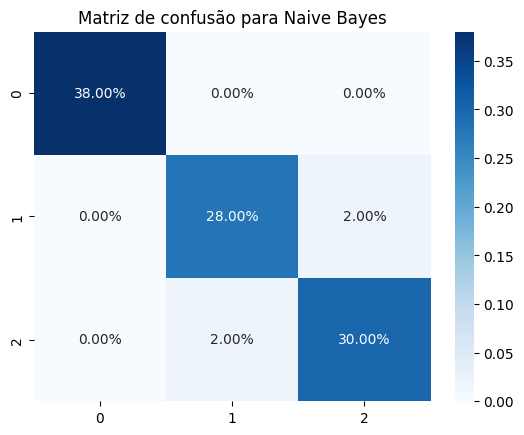

In [15]:
import seaborn as sns # para visualização da matriz de confusão
from sklearn.metrics import confusion_matrix # para geração da matriz de confusão

# Implemente a sua solução aqui
cf_matrix = confusion_matrix(y_test, gnb_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues').set(title='Matriz de confusão para Naive Bayes')
plt.show()

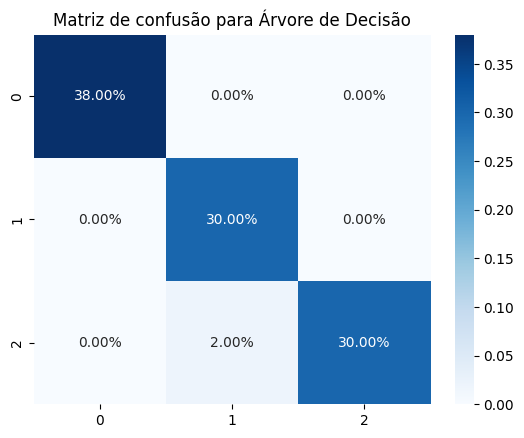

In [16]:
cf_matrix = confusion_matrix(y_test, dt_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues').set(title='Matriz de confusão para Árvore de Decisão')
plt.show()

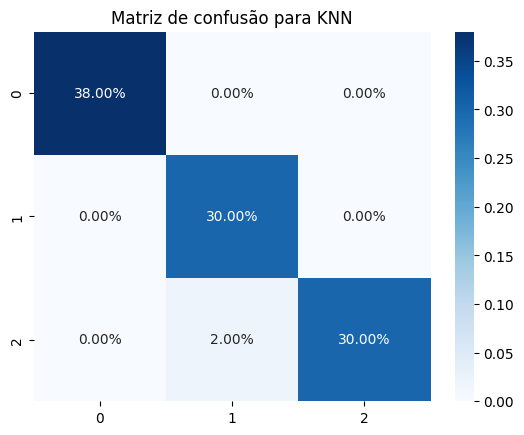

In [17]:
cf_matrix = confusion_matrix(y_test, nn_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues').set(title='Matriz de confusão para KNN')
plt.show()

## 4. Conjunto de Exercícios - Tarefa de Regressão (desafio)

- Agora é com você! Repita os mesmos passos definidos para a tarefa de classificação sobre os dados da tarefa de regressão (base de dados de diabetes). Fique atento às nuâncias que existem entre os dois tipos de problemas, principalmente aos modelos que irá utilizar e as métricas! Sinta-se livre para explorar outros *pipelines*, preprocessamentos, e até mesmo uma outra base de dados! A ideia deste exercício é fazer com que você coloque a mão na massa por conta própria, enfrentando os problemas que encontrar ao longo do caminho.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [85]:
# Load the dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Convert features to a DataFrame for easier handling
y = data.target
X


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


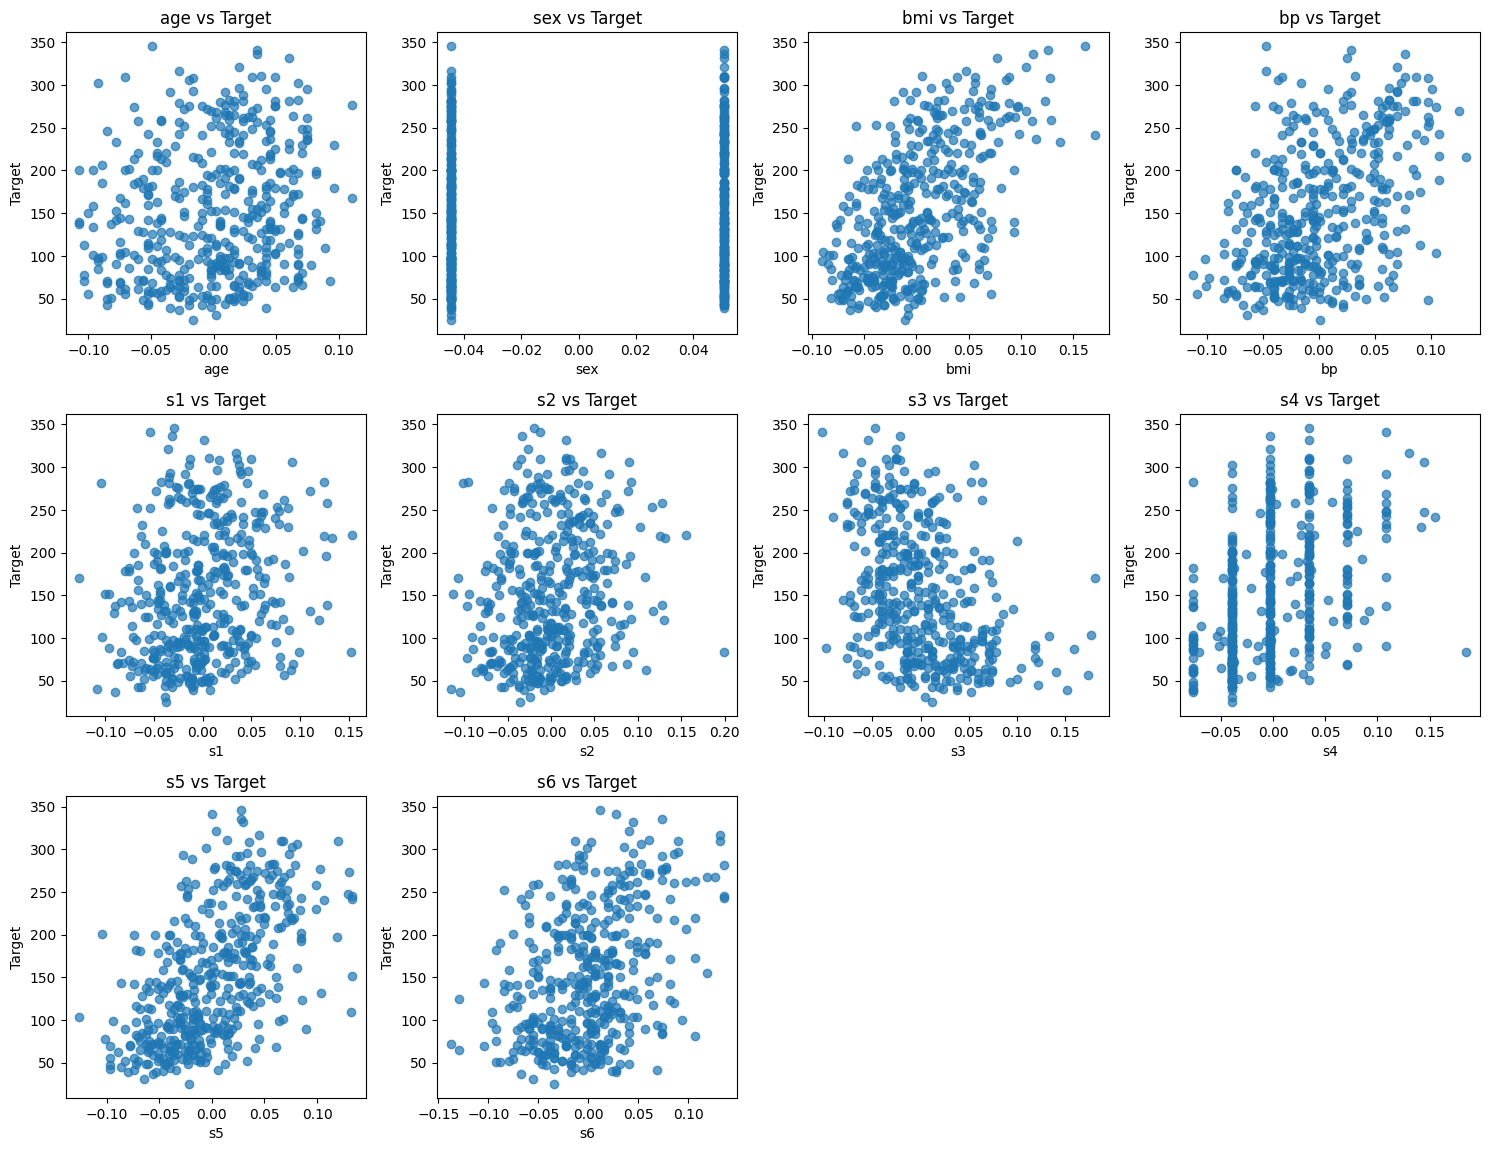

In [87]:
# Plot the relationship between each feature and the label
plt.figure(figsize=(15, 15))  # Set the figure size

for i, feature in enumerate(data.feature_names, 1):  # Enumerate through feature names and their indices
    plt.subplot(4, 4, i)  # Create a grid of subplots (4 rows x 4 columns)
    plt.scatter(X[feature], y, alpha=0.7)  # Scatter plot for feature vs target
    plt.title(f"{feature} vs Target")  # Set the title with the feature name
    plt.xlabel(feature)  # X-axis label
    plt.ylabel("Target")  # Y-axis label

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [88]:
correlation_matrix = pd.DataFrame(X, columns=data.feature_names).corr()

# Display correlation matrix
print(correlation_matrix)

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

In [89]:
high_correlation_pairs = [
    (feature1, feature2)
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > 0.7
]
print("Highly Correlated Feature Pairs:", high_correlation_pairs)

Highly Correlated Feature Pairs: [('s1', 's2'), ('s2', 's1'), ('s3', 's4'), ('s4', 's3')]


In [90]:
'''selected_features = ['age', 'bmi', 'bp', 's1', 's3', 's5', 's6']
X = X[selected_features]'''

"selected_features = ['age', 'bmi', 'bp', 's1', 's3', 's5', 's6']\nX = X[selected_features]"

In [91]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Linear Regression ###
Best Parameters for Linear Regression: {}
Cross-Validation R²: 0.4203 ± 0.1033
Test MAE: 41.9645
Test MSE: 2817.8083
Test R²: 0.5104


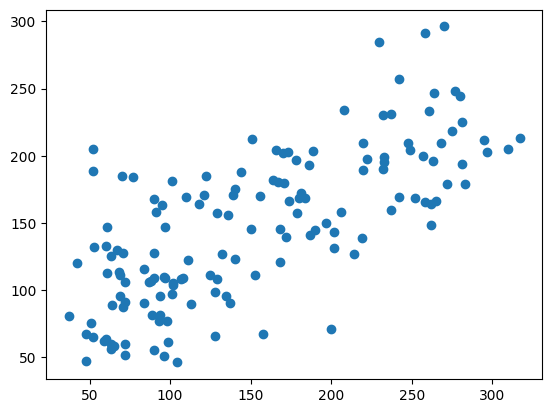


### KNN Regression ###
Best Parameters for KNN Regression: {'n_neighbors': 10}
Cross-Validation R²: 0.3375 ± 0.0775
Test MAE: 44.6068
Test MSE: 3093.3685
Test R²: 0.4625


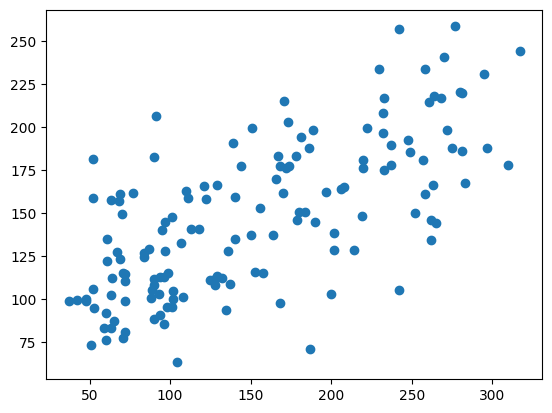


### Random Forest Regression ###
Best Parameters for Random Forest Regression: {'max_depth': 10, 'n_estimators': 200}


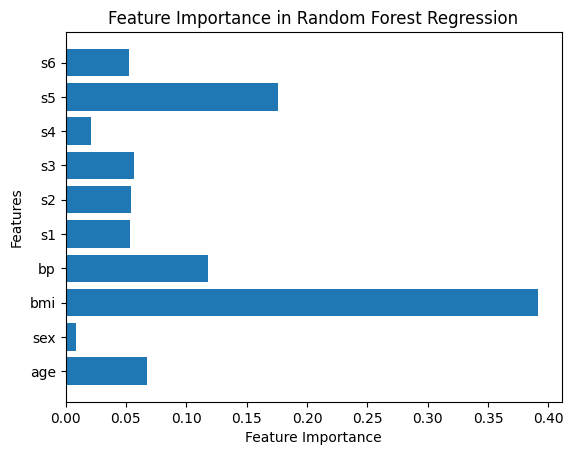

Cross-Validation R²: 0.3681 ± 0.1190
Test MAE: 44.4504
Test MSE: 3134.1646
Test R²: 0.4554


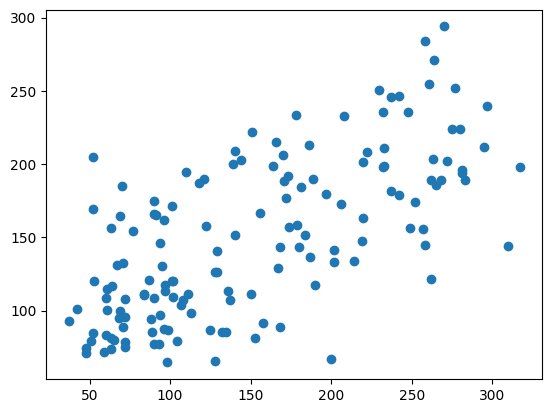


### Gradient Boosting ###
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


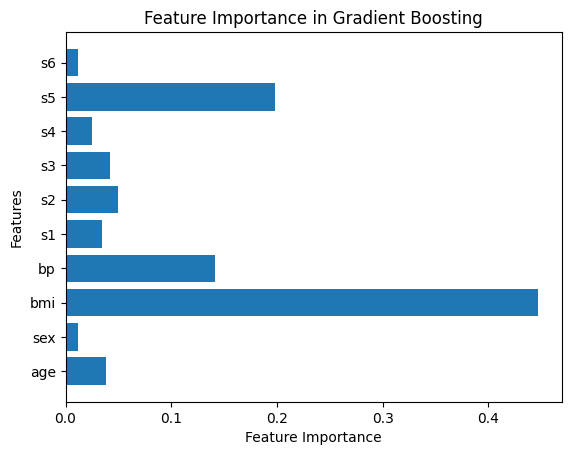

Cross-Validation R²: 0.3445 ± 0.1108
Test MAE: 45.2906
Test MSE: 3141.1396
Test R²: 0.4542


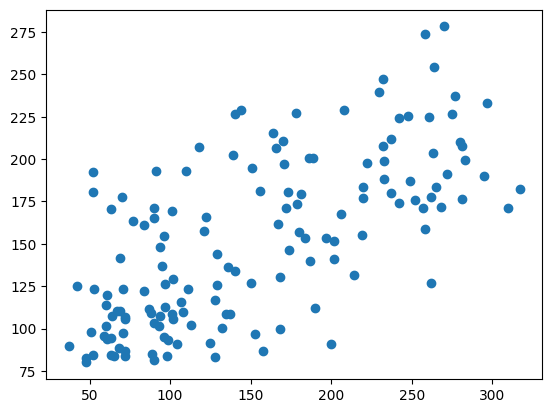


### SVR ###
Best Parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validation R²: 0.3559 ± 0.0630
Test MAE: 42.6389
Test MSE: 2823.1319
Test R²: 0.5095


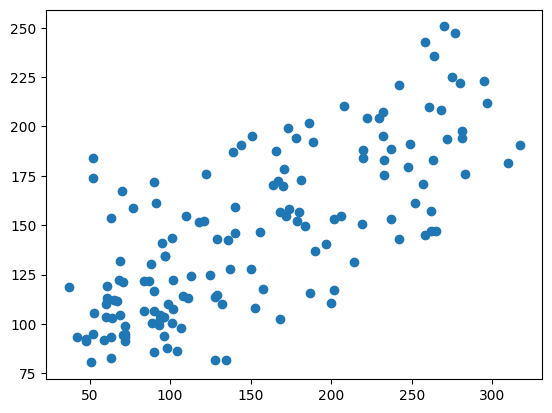


### XGBoost ###
Best Parameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 1000, 'reg_alpha': 0.01, 'reg_lambda': 100}


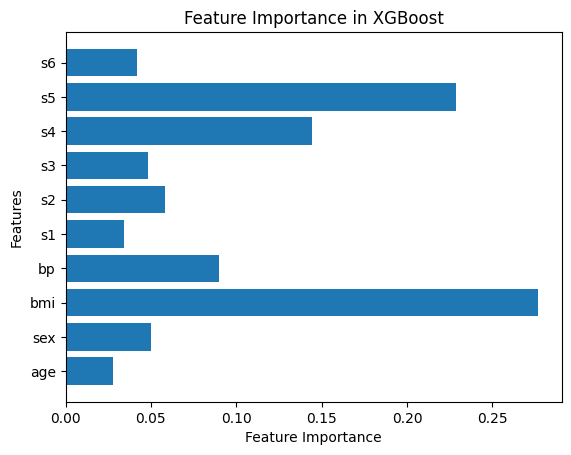

Cross-Validation R²: 0.3277 ± 0.1232
Test MAE: 41.7640
Test MSE: 2802.2186
Test R²: 0.5131


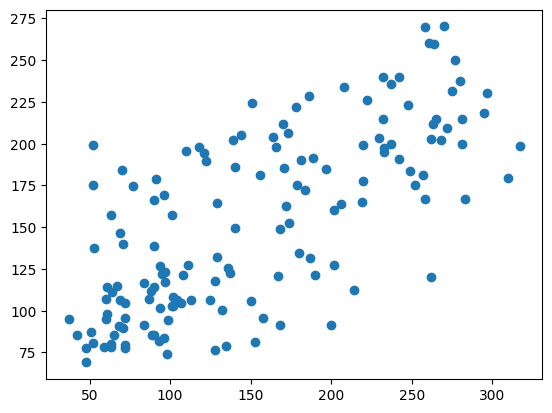

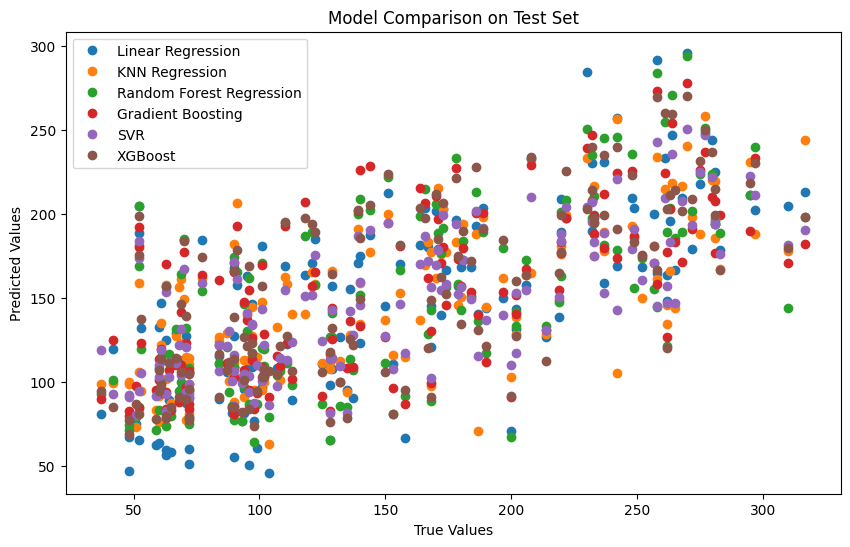


### Summary of Test R² Scores ###
                      Model        R²
0         Linear Regression  0.510394
1            KNN Regression  0.462515
2  Random Forest Regression  0.455426
3         Gradient Boosting  0.454214
4                       SVR  0.509469
5                   XGBoost  0.513103


In [92]:
# Definir os modelos
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'Linear Regression': {},
    'KNN Regression': {'n_neighbors': [3, 5, 7, 10]},
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
    },
    'Gradient Boosting': {'n_estimators': [100, 250, 500], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 9]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'XGBoost': {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [200, 500, 1000],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 10, 100]
    }
}

# Criar um KFold para validação cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Função para calcular métricas e cross-validation
def evaluate_model_with_cv(model, X_train, y_train, X_test, y_test):
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    print(f"Cross-Validation R²: {scores.mean():.4f} ± {scores.std():.4f}")
    
    # Ajustar e avaliar no conjunto de teste
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    # Métricas no conjunto de teste
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²: {r2:.4f}")
    
    return r2, y_pred_test

# Realizar grid-search, validação cruzada e avaliação final
results = []
for model_name, model in models.items():
    print(f"\n### {model_name} ###")
    
    grid_search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    try:

        best_model.fit(X_train, y_train)
        plt.barh(data.feature_names, best_model.feature_importances_)
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title(f"Feature Importance in {model_name}")
        plt.show()
    except:
        pass
        
    
    # Avaliar o modelo com cross-validation e no conjunto de teste
    r2, y_pred_test = evaluate_model_with_cv(best_model, X_train, y_train, X_test, y_test)
    plt.scatter(y_test, y_pred_test)
    plt.show()
    results.append({'Model': model_name, 'R²': r2, 'Predicted': y_pred_test})

# Comparar os modelos graficamente
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(y_test, result['Predicted'], 'o', label=result['Model'])

plt.title("Model Comparison on Test Set")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Resumo das métricas
results_df = pd.DataFrame(results).drop(columns='Predicted')
print("\n### Summary of Test R² Scores ###")
print(results_df)
